In [27]:
# ak9943
# import all the necessary libraries
import numpy as np
import torch
import torchvision
import keras
import tensorflow as tf

import matplotlib.pyplot as plt

In [28]:
# loading the MNIST data
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [29]:
# normalizing images

train_images = train_images / 255.0
test_images = test_images / 255.0

In [30]:
# one hot encoding the labels
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [31]:
print(train_labels)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [32]:
# building the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = keras.Sequential([
    Flatten(input_shape = (28, 28)),
    Dense(256, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

In [33]:
# compiling the model
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer = Adam(),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
  )

In [34]:
# Fitting the model

# history = model.fit(train_images,
#                     train_labels,
#                     epochs = 20,
#                     batch_size = 128,
#                     validation_split = 0.2,
#                     verbose = 2
#                   )

history = model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_split=0.2, verbose=2)

Epoch 1/20
375/375 - 4s - loss: 0.5471 - accuracy: 0.8047 - val_loss: 0.4022 - val_accuracy: 0.8543 - 4s/epoch - 11ms/step
Epoch 2/20
375/375 - 3s - loss: 0.3854 - accuracy: 0.8599 - val_loss: 0.3808 - val_accuracy: 0.8595 - 3s/epoch - 7ms/step
Epoch 3/20
375/375 - 3s - loss: 0.3387 - accuracy: 0.8755 - val_loss: 0.3580 - val_accuracy: 0.8718 - 3s/epoch - 7ms/step
Epoch 4/20
375/375 - 4s - loss: 0.3133 - accuracy: 0.8851 - val_loss: 0.3364 - val_accuracy: 0.8770 - 4s/epoch - 10ms/step
Epoch 5/20
375/375 - 3s - loss: 0.2935 - accuracy: 0.8915 - val_loss: 0.3279 - val_accuracy: 0.8808 - 3s/epoch - 9ms/step
Epoch 6/20
375/375 - 3s - loss: 0.2807 - accuracy: 0.8965 - val_loss: 0.3119 - val_accuracy: 0.8880 - 3s/epoch - 7ms/step
Epoch 7/20
375/375 - 3s - loss: 0.2649 - accuracy: 0.9018 - val_loss: 0.3256 - val_accuracy: 0.8881 - 3s/epoch - 7ms/step
Epoch 8/20
375/375 - 3s - loss: 0.2562 - accuracy: 0.9046 - val_loss: 0.3087 - val_accuracy: 0.8883 - 3s/epoch - 8ms/step
Epoch 9/20
375/375 - 3

In [35]:
print("Teting data accuracy: ", test_accuracy)

Teting data accuracy:  0.8884000182151794


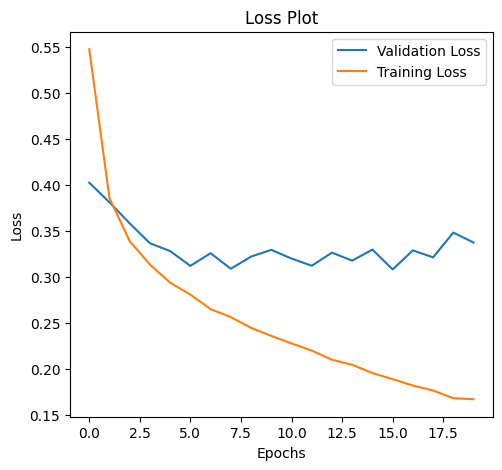

In [42]:
# PLotting loss values of training and validation data
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Loss Plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.legend()

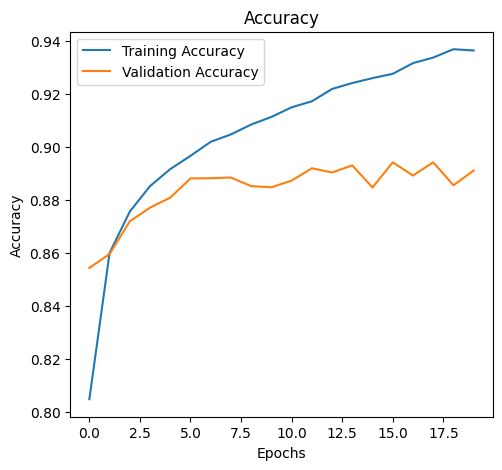

In [45]:
# Plotting training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()

1/1 [==============================] - 0s 23ms/step


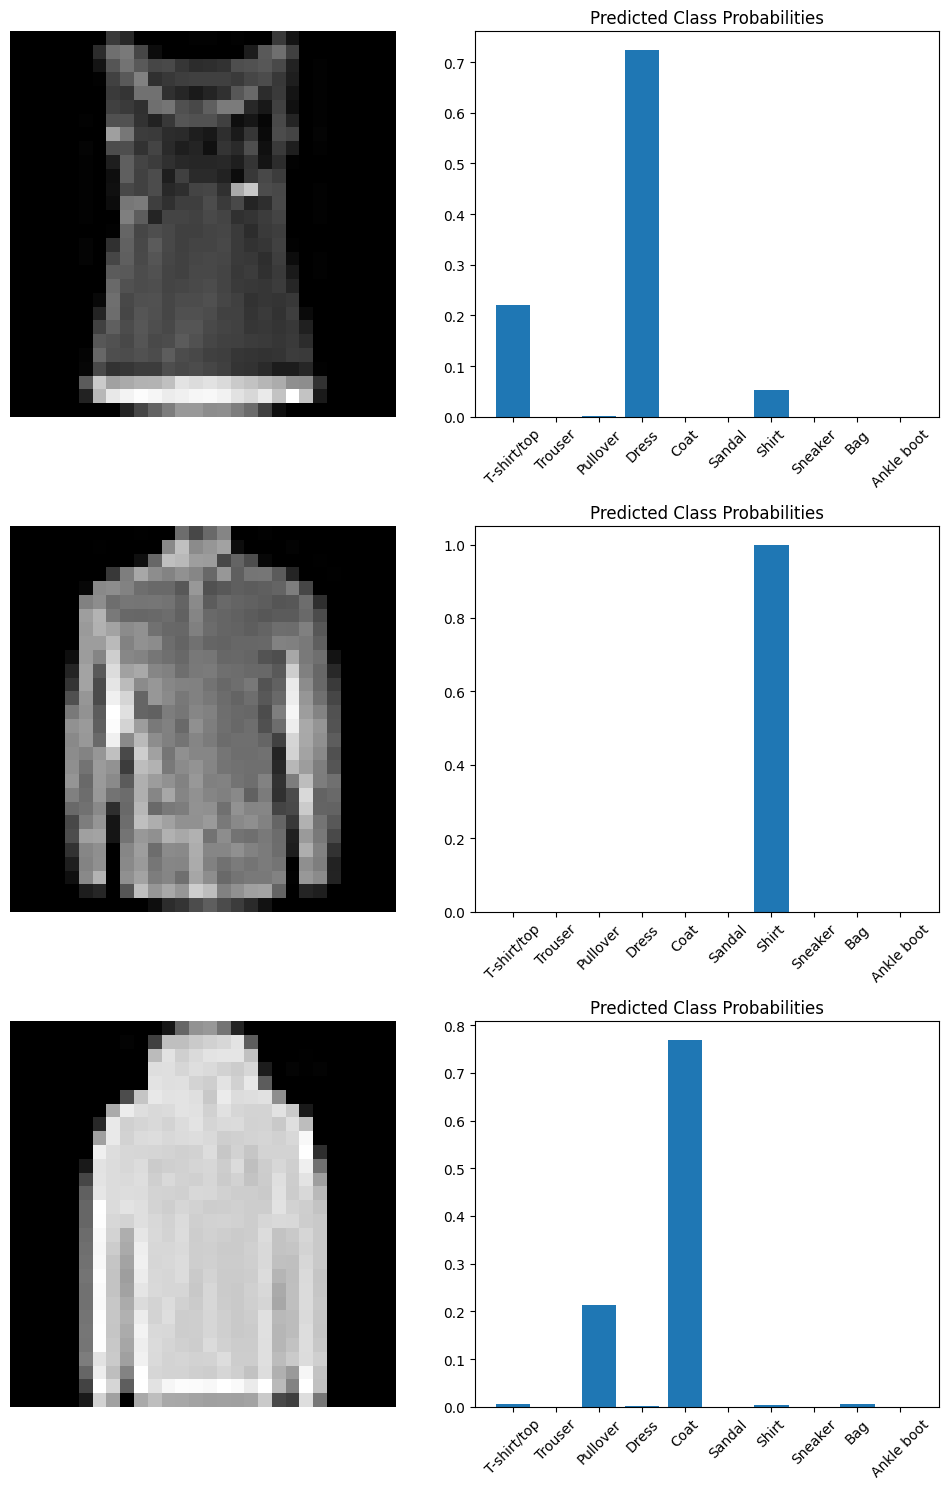

In [47]:
indices = np.random.choice(range(len(test_images)), 3, replace = False)

sample_images = test_images[indices]
sample_predictions = model.predict(sample_images)

fig, axes = plt.subplots(3, 2, figsize=(10, 15))
# all the items
class_names = ['T-shirt/top',
         'Trouser',
         'Pullover',
         'Dress',
         'Coat',
         'Sandal',
         'Shirt',
         'Sneaker',
         'Bag',
         'Ankle boot']

for i, (image, prediction) in enumerate(zip(sample_images, sample_predictions)):
  axes[i, 0].imshow(image, cmap='gray')
  axes[i, 0].axis('off')
  axes[i, 1].bar(range(10), prediction)
  axes[i, 1].set_xticks(range(10))
  axes[i, 1].set_xticklabels(class_names, rotation=45)
  axes[i, 1].set_title('Predicted Class Probabilities')

plt.tight_layout()

I used PyTorch because it provides a powerful framework for building and training neural networks with automatic differentiation, making it easier to define complex models and optimize them efficiently. Torchvision was employed for its convenient dataset handling, including loading and preprocessing FashionMNIST images. Matplotlib was chosen for visualization purposes, allowing for the creation of plots to display loss curves and predicted class probabilities. Lastly, NumPy was utilized for array operations and data manipulation, complementing PyTorch's functionality. Overall, these libraries offer a comprehensive toolkit for developing, training, and evaluating neural network models for image classification tasks.